# Part 1

# Code taken from ECS766_Lab06

In [1]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [2]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import numpy as np
import statistics
import matplotlib.pyplot as plt



te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
print(te_ary)

[[False False False  True False  True  True  True  True False  True]
 [False False  True  True False  True False  True  True False  True]
 [ True False False  True False  True  True False False False False]
 [False  True False False False  True  True False False  True  True]
 [False  True False  True  True  True False False  True False False]]


In [3]:
df = pd.DataFrame(te_ary, columns=te.columns_)
display(df)

Apple   Corn   Dill   Eggs  Ice cream  Kidney Beans   Milk  Nutmeg  Onion  \
0  False  False  False   True      False          True   True    True   True   
1  False  False   True   True      False          True  False    True   True   
2   True  False  False   True      False          True   True   False  False   
3  False   True  False  False      False          True   True   False  False   
4  False   True  False   True       True          True  False   False   True   

   Unicorn  Yogurt  
0    False    True  
1    False    True  
2    False   False  
3     True    True  
4    False   False

In [4]:
frequent_itemsets = apriori(df, min_support=0.2)
display(frequent_itemsets)

itemset = frequent_itemsets.loc[5]
print('Itemset: {0}. Support: {1}.'.format(itemset['itemsets'], itemset['support']))

support             itemsets
0        0.2                  (0)
1        0.4                  (1)
2        0.2                  (2)
3        0.8                  (3)
4        0.2                  (4)
..       ...                  ...
144      0.4     (3, 5, 7, 8, 10)
145      0.2     (3, 6, 7, 8, 10)
146      0.2     (5, 6, 7, 8, 10)
147      0.2  (2, 3, 5, 7, 8, 10)
148      0.2  (3, 5, 6, 7, 8, 10)

[149 rows x 2 columns]

Itemset: frozenset({5}). Support: 1.0.


In [5]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
display(frequent_itemsets)

support                     itemsets
0       0.8                       (Eggs)
1       1.0               (Kidney Beans)
2       0.6                       (Milk)
3       0.6                      (Onion)
4       0.6                     (Yogurt)
5       0.8         (Eggs, Kidney Beans)
6       0.6                (Eggs, Onion)
7       0.6         (Milk, Kidney Beans)
8       0.6        (Onion, Kidney Beans)
9       0.6       (Yogurt, Kidney Beans)
10      0.6  (Eggs, Onion, Kidney Beans)

In [6]:
strong_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0)
display(strong_rules)

antecedents            consequents  antecedent support  \
0                  (Eggs)         (Kidney Beans)                 0.8   
1          (Kidney Beans)                 (Eggs)                 1.0   
2                  (Eggs)                (Onion)                 0.8   
3                 (Onion)                 (Eggs)                 0.6   
4                  (Milk)         (Kidney Beans)                 0.6   
5          (Kidney Beans)                 (Milk)                 1.0   
6                 (Onion)         (Kidney Beans)                 0.6   
7          (Kidney Beans)                (Onion)                 1.0   
8                (Yogurt)         (Kidney Beans)                 0.6   
9          (Kidney Beans)               (Yogurt)                 1.0   
10          (Eggs, Onion)         (Kidney Beans)                 0.6   
11   (Eggs, Kidney Beans)                (Onion)                 0.8   
12  (Onion, Kidney Beans)                 (Eggs)                 0.6   
13                 (Eggs)  (Onion, Kidney Beans)                 0.8   
14                (Onion)   (Eggs, Kidney Beans)                 0.6   
15         (Kidney Beans)          (Eggs, Onion)                 1.0   

    consequent support  support  confidence  lift  leverage  conviction  
0                  1.0      0.8        1.00  1.00      0.00         inf  
1                  0.8      0.8        0.80  1.00      0.00         1.0  
2                  0.6      0.6        0.75  1.25      0.12         1.6  
3                  0.8      0.6        1.00  1.25      0.12         inf  
4                  1.0      0.6        1.00  1.00      0.00         inf  
5                  0.6      0.6        0.60  1.00      0.00         1.0  
6                  1.0      0.6        1.00  1.00      0.00         inf  
7                  0.6      0.6        0.60  1.00      0.00         1.0  
8                  1.0      0.6        1.00  1.00      0.00         inf  
9                  0.6      0.6        0.60  1.00      0.00         1.0  
10                 1.0      0.6        1.00  1.00      0.00         inf  
11                 0.6      0.6        0.75  1.25      0.12         1.6  
12                 0.8      0.6        1.00  1.25      0.12         inf  
13                 0.6      0.6        0.75  1.25      0.12         1.6  
14                 0.8      0.6        1.00  1.25      0.12         inf  
15                 0.6      0.6        0.60  1.00      0.00         1.0

# Question 1

Apriori uses an iterative approach to explore (k+1)-itemsets using k-itemsets.
Firstly the algorithm finds frequent 1-itemset (1 element), this is done by scanning the database to accumulate the count for each item, and collecting those items that satisfy minimum support. The resulting set is denoted by L1. Then using that information, estimates L2 the frequent 2-itemsets (2-elements), then on to 3-itemsets and so on. The Apriori algorithm improves efficiency as we use an 'Apriori property' to reduce search pace. The Apriori property is that all nonempty subsets of a frequent itemset must also be frequent, in other words if we have an itemset that is frequent, then any subset of this frequent itsemset must be frequent. For example, if {bread, milk} is frequent, the {milk} must also be frequent. This iterative approach continues until no more frequent k-itemsets can be found. The finding of each LK requires one full scan of the database.

# Question 2

The Apriori algorithm finds the sequence of frequent k-itemsets from L1,L2...Lk. It does this by firstly generating a sequence of 1-itemset, L1. Subsequently, it uses L1 to generare 2-itemset L2 and this is done recursively as the information from the previous iteration is used to estimate the frequent itemsets in the next iteration. So L1 is used to generate the list of L2 and so on until Lk, k-itemsets. Because of the Apriori property (all nonempty subsets of a frequent itemset must also be frequent), every frequent k-itemset must be a superset of an itemset in L1.

# Question 3

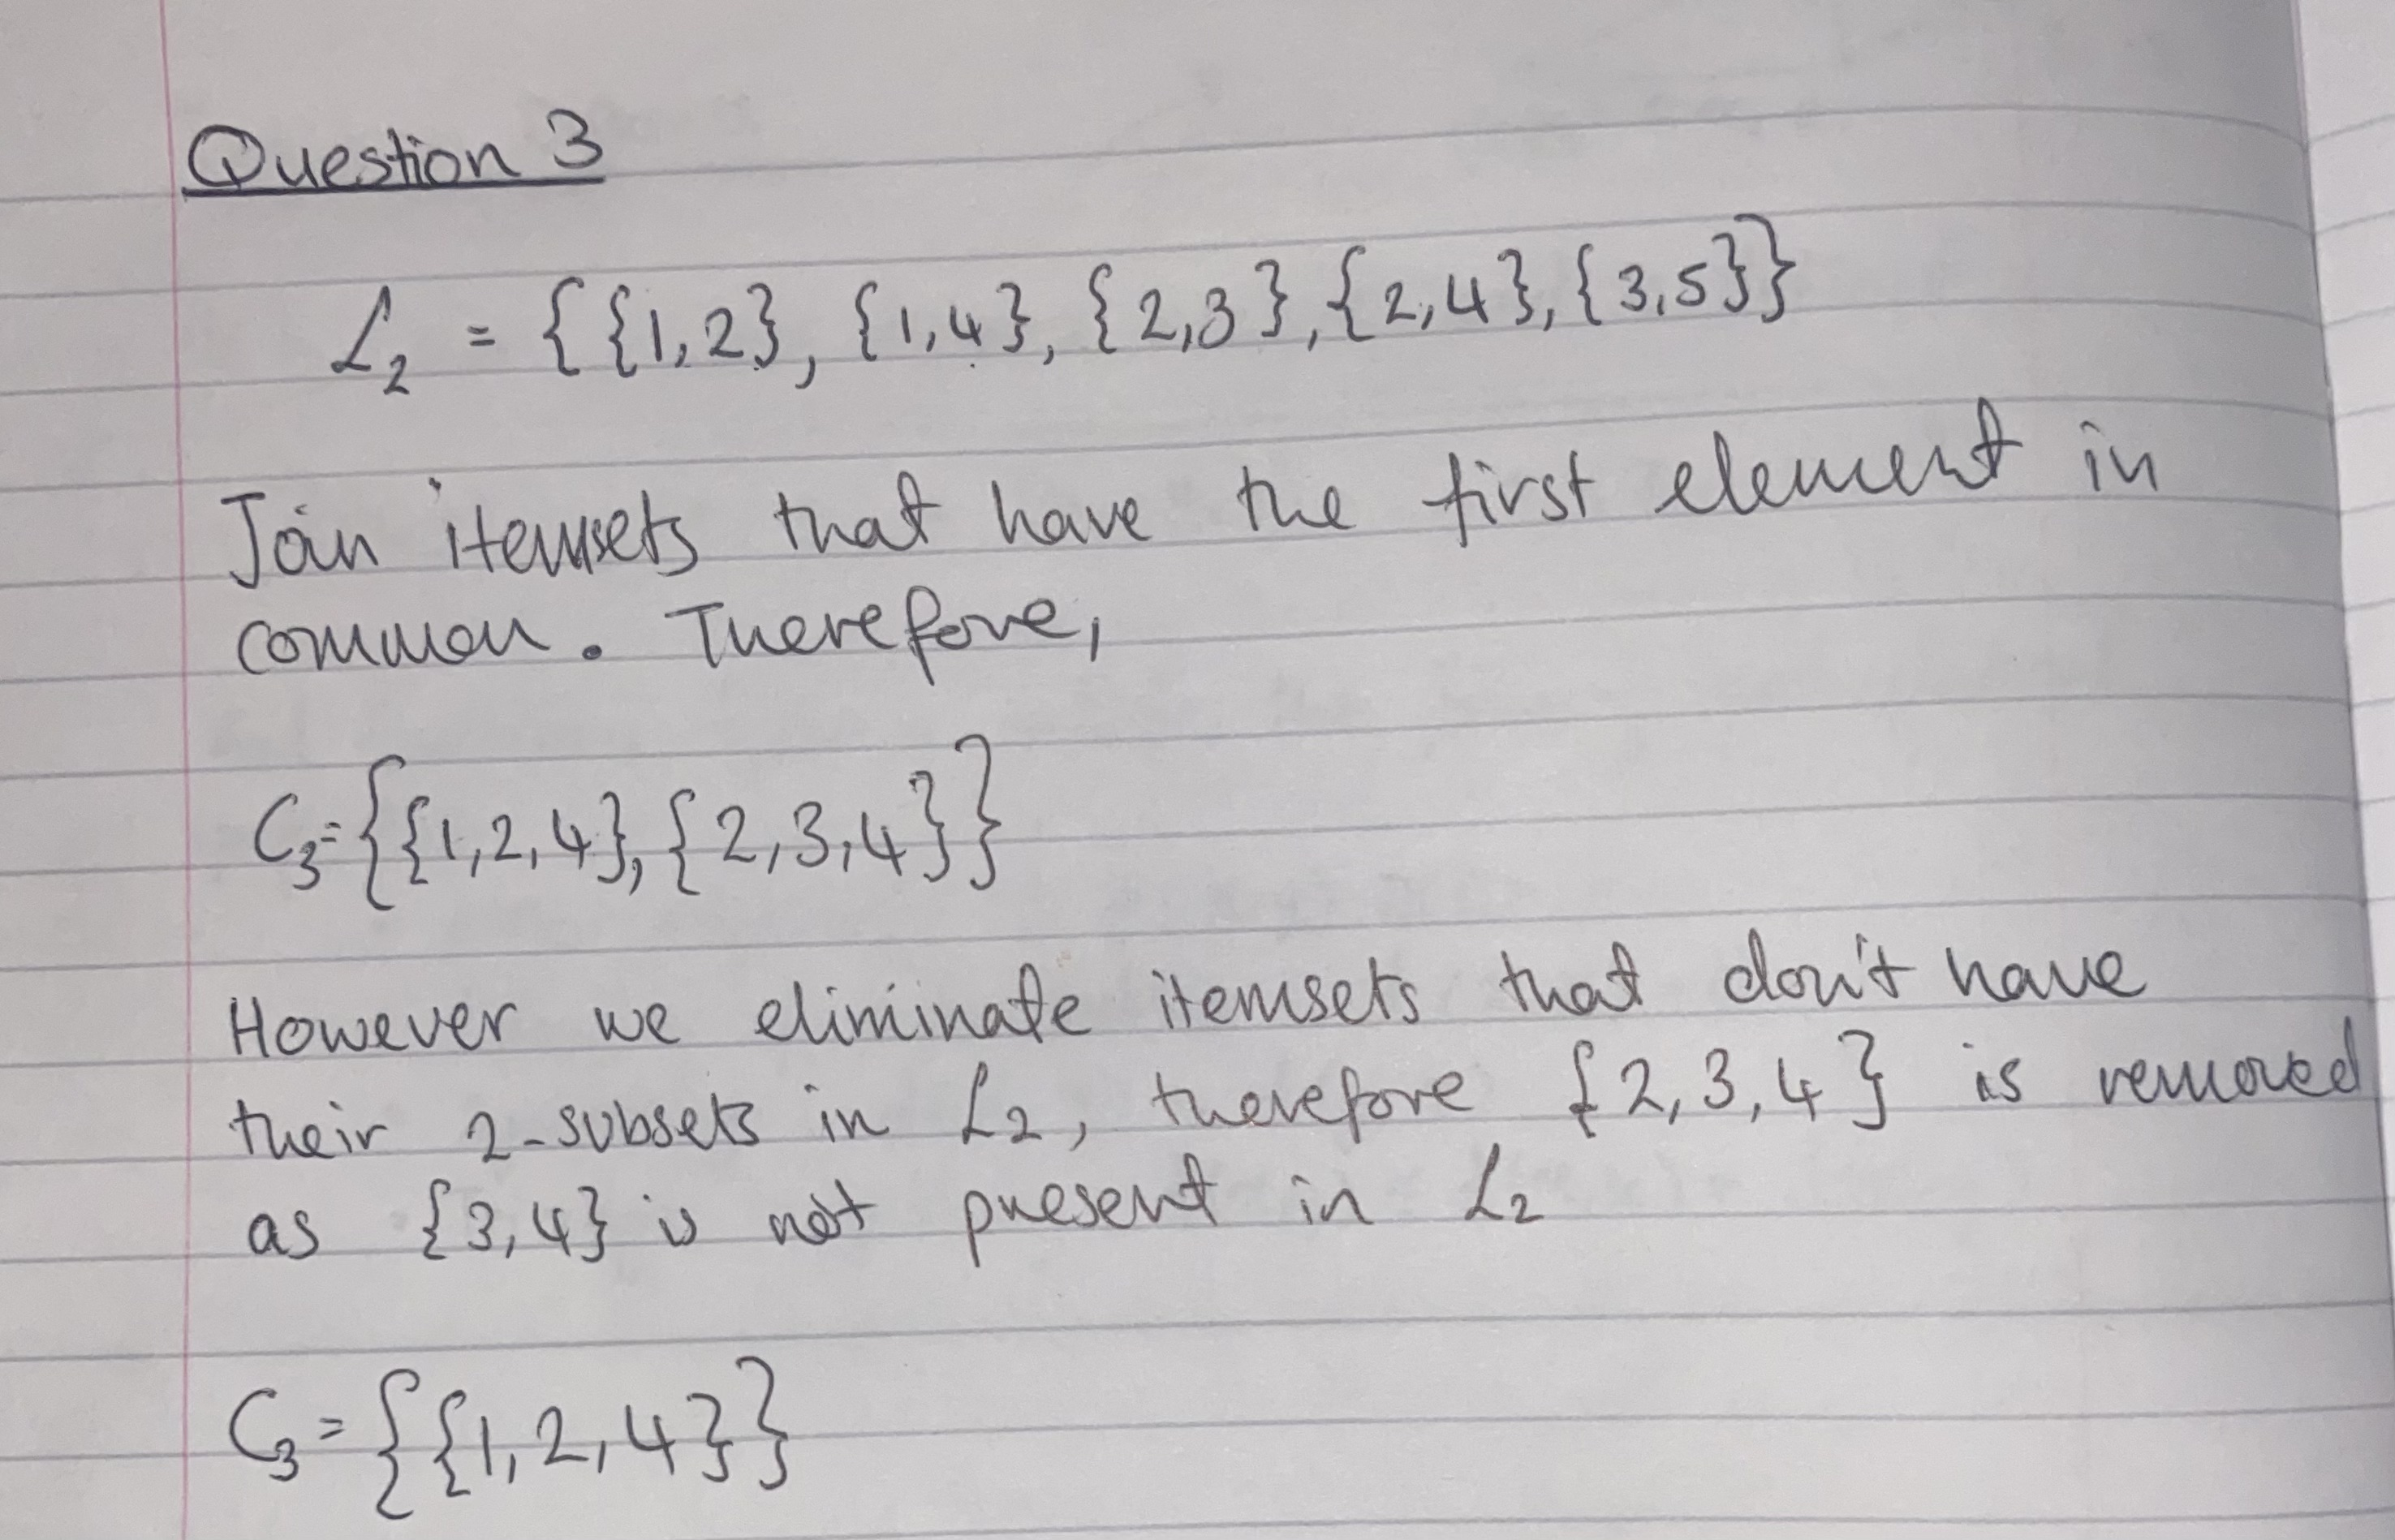

# Question 4

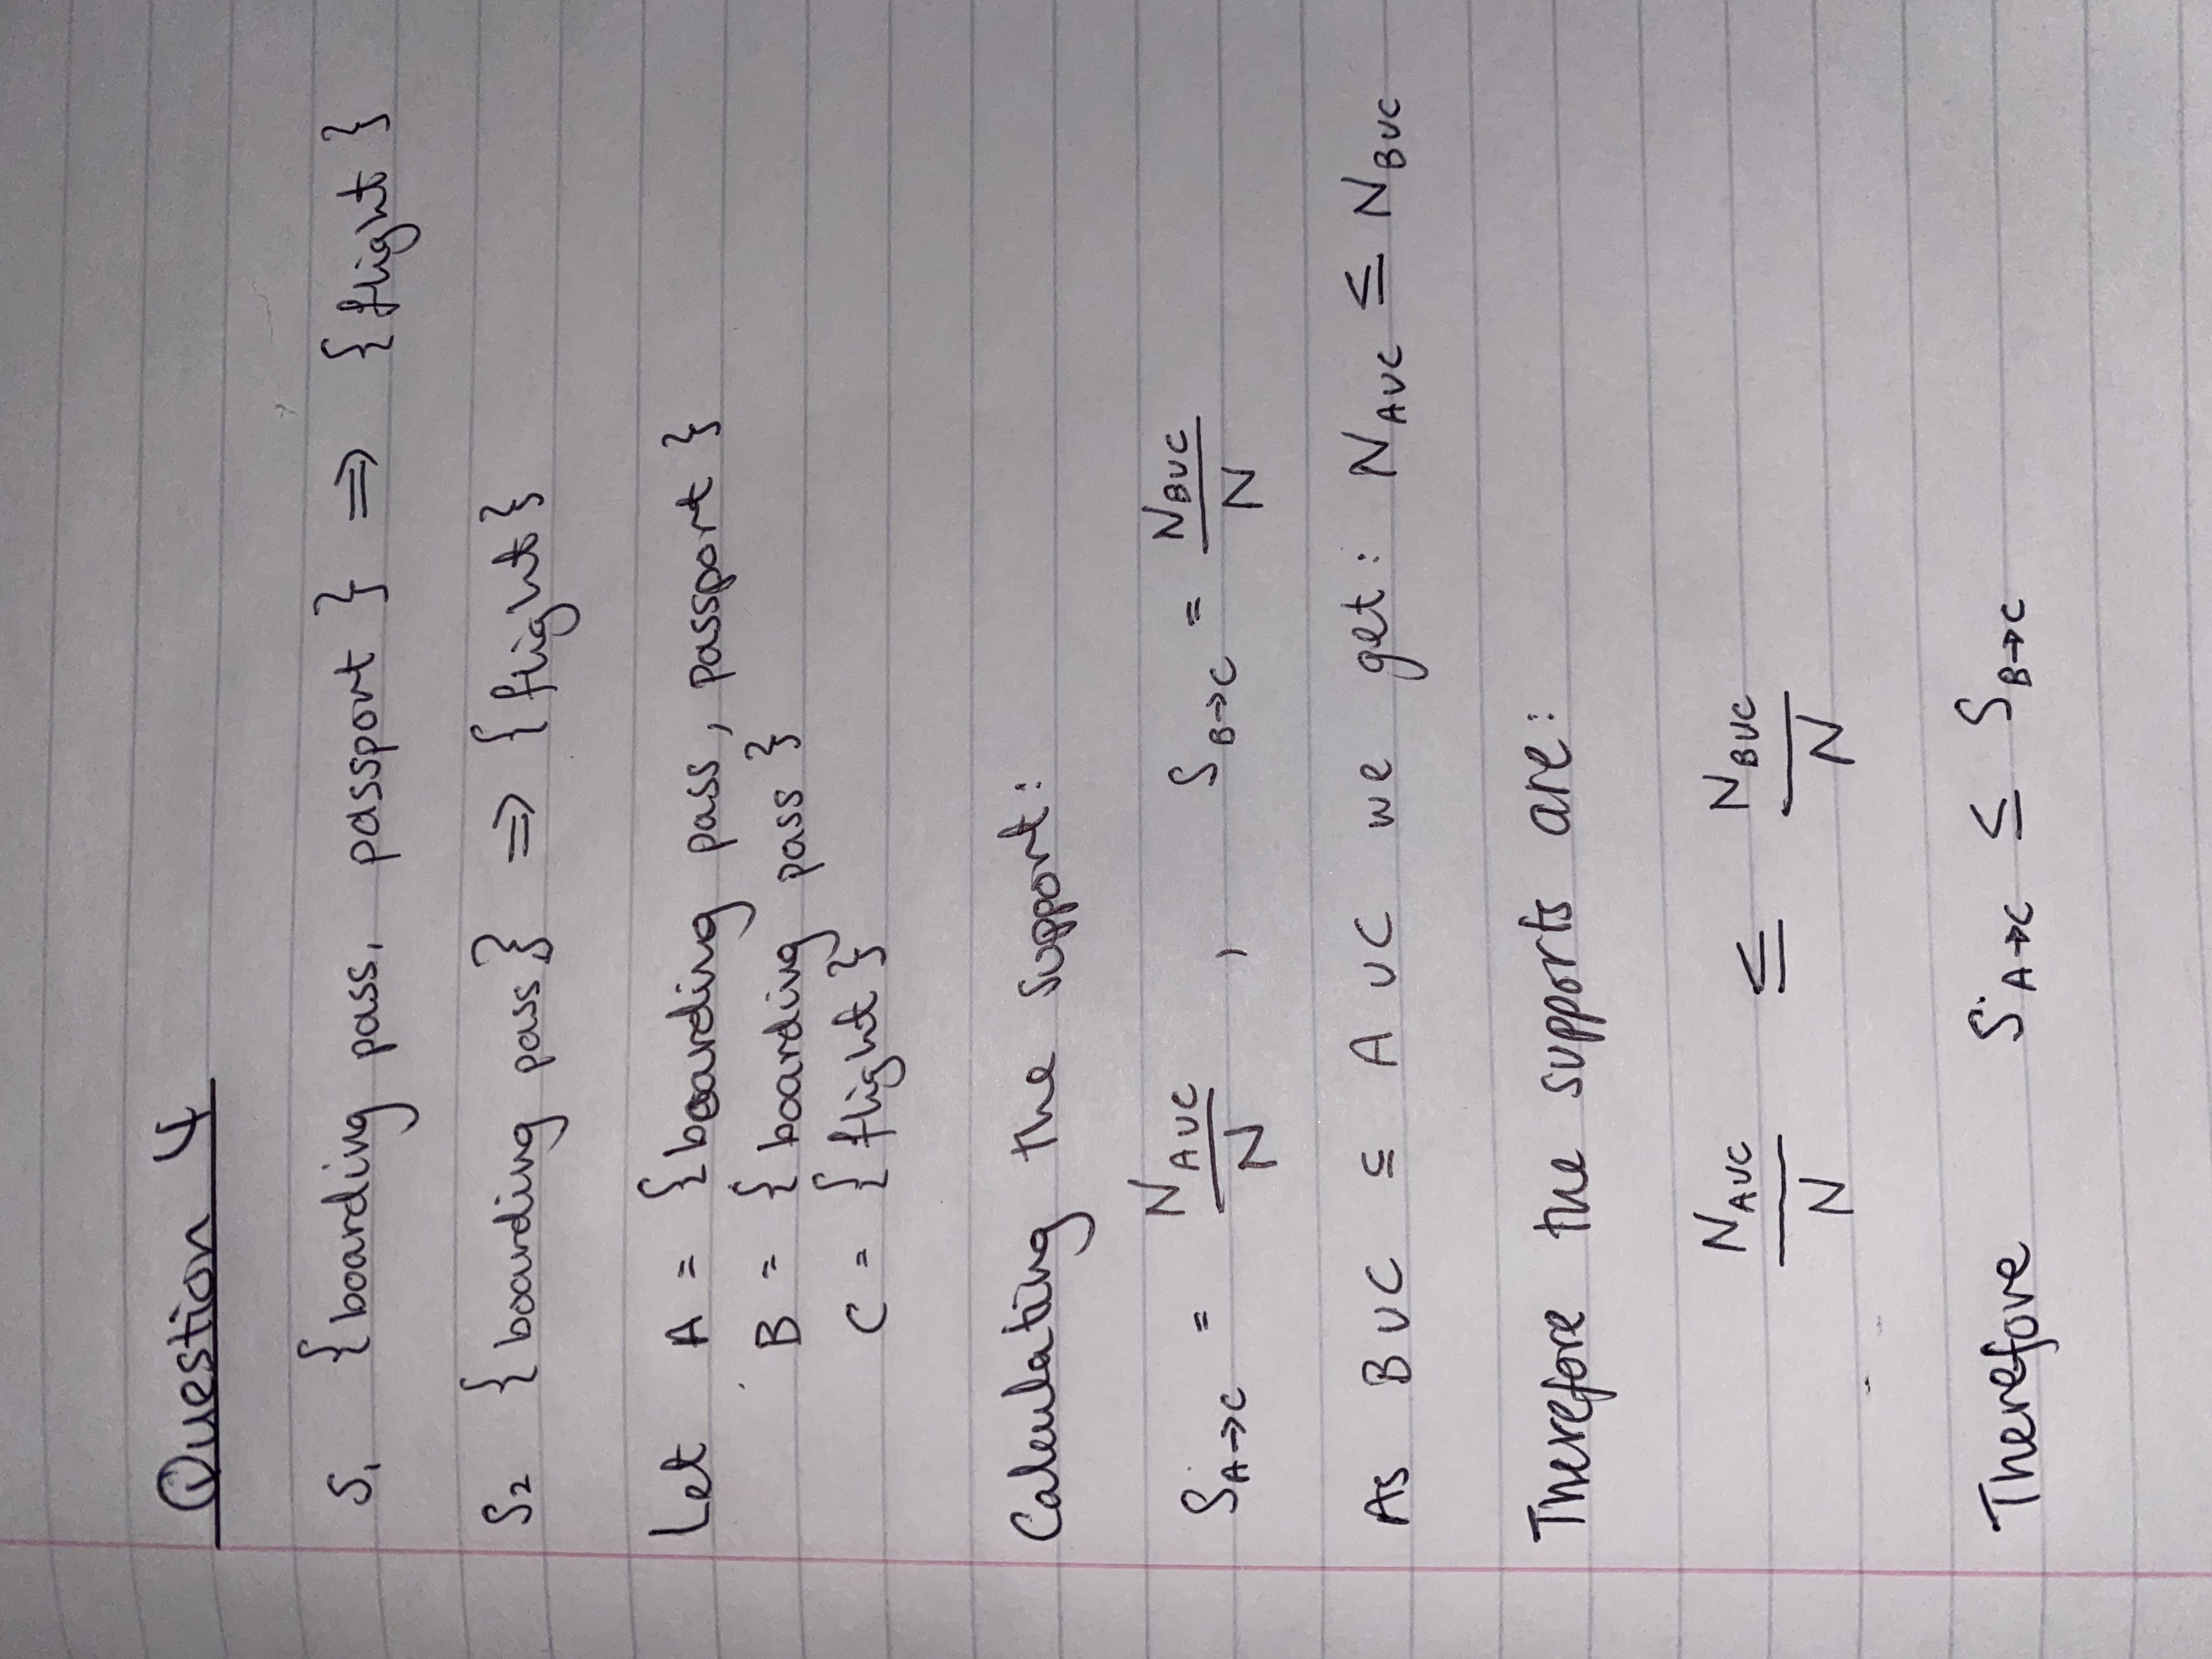

# Question 5

Suppport = (No. of transactions that contain Eggs)/(No. of transactions)

Support = 4/5


Support = 0.8

# Question 6

In [7]:
# here we alter minimum support to = 0.2
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
display(frequent_itemsets)
itemset = frequent_itemsets.loc[5]
print('Itemset: {0}. Support: {1}.'.format(itemset['itemsets'], itemset['support']))

support                                           itemsets
0        0.2                                            (Apple)
1        0.4                                             (Corn)
2        0.2                                             (Dill)
3        0.8                                             (Eggs)
4        0.2                                        (Ice cream)
..       ...                                                ...
144      0.4        (Kidney Beans, Eggs, Yogurt, Onion, Nutmeg)
145      0.2                (Eggs, Yogurt, Onion, Milk, Nutmeg)
146      0.2        (Kidney Beans, Yogurt, Onion, Milk, Nutmeg)
147      0.2  (Kidney Beans, Eggs, Yogurt, Onion, Dill, Nutmeg)
148      0.2  (Kidney Beans, Eggs, Yogurt, Onion, Milk, Nutmeg)

[149 rows x 2 columns]

Itemset: frozenset({'Kidney Beans'}). Support: 1.0.


In [8]:
# Adding a itemset length column
frequent_itemsets['itemsets length'] = frequent_itemsets['itemsets'].str.len()
# sorting the frequent itemset table to display the maximum itemsets length
frequent_itemsets.sort_values('itemsets length',ascending=False).head(1)

support                                           itemsets  \
148      0.2  (Kidney Beans, Eggs, Yogurt, Onion, Milk, Nutmeg)   

     itemsets length  
148                6

The maximum length of a frequent itemset for a support threshold is 6.

# Question 7

In [9]:
def kulczynski(a,b):
    # filters 1 and 2 collect the appropriate rows given the itemsets 'a' and 'b'
    filt_1 = strong_rules[(strong_rules['antecedents']==frozenset(a)) & (strong_rules['consequents']==frozenset(b))]
    filt_2 = strong_rules[(strong_rules['antecedents']==frozenset(b)) & (strong_rules['consequents']==frozenset(a))]
    
    # using those rows, here we use their 'confidence' values required to calculate the Kulczynski measure
    kulczynski_measure = ((float(filt_1['confidence']) + float(filt_2['confidence']))/2)
    
    return kulczynski_measure

In [10]:
kulczynski({'Onion'},{'Eggs','Kidney Beans'})

0.875

# Question 8

In [11]:
def imbalance(a,b,anb):
    # retrieving the support counts for itemset 'a','b' and 'aub'
    na = float(frequent_itemsets[frequent_itemsets['itemsets']== frozenset(a)]['support'])
    nb = float(frequent_itemsets[frequent_itemsets['itemsets']== frozenset(b)]['support'])
    nab = float(frequent_itemsets[frequent_itemsets['itemsets']== frozenset(anb)]['support'])
    # using values to calculate the imbalance ratio
    imbalance = abs(na-nb)/(na+nb-nab)
    
    return imbalance

In [12]:
imbalance({'Onion'},{'Eggs','Kidney Beans'}, {'Onion','Eggs','Kidney Beans'})

0.2500000000000001

# Part 2

# Question 1

Contextual attributes: The contextual attributes of a data object define the object’s context. [1]

Behavioral attributes: These define the object’s characteristics, and are used to evaluate whether the object is an outlier in the context.[1]


Contextual attributes:
- Percentage of credit limit used.
- Age group

Behavioural attributes:
- A customer who has a low credit limit spending 75% or more.
- Total transaction amount per annum.

For a customer who has a low credit limit then you would expect them using the majority of their allowance hence not be classed as an outlier. However, if a person from a high income category displayed the same behaviour of regularly spending the majority of their limit it would be classed as an outlier. Here the percentage of credit limit would be the context attribute as we would consider a customers behaviour with respect how much of their limit they spend.

Another contextual attribute would be age groups of customers. As customers get older you would expect their spending behaviour to increase per year as they gather more financial responsibilities like a mortgage, providing for a family, business ventures and so on. However after a certain age (i.e. retirement age) you could expect customers to not need to spend as much and see their spending to decrease. Here the context attribute is the customers age and we can consider their total transaction ammount as behaviour.


[1] Data Mining: Concepts and Techniques, Jiawei Han, Micheline Kamber, 2011

# Question 2

In [13]:
# load dataset
df = pd.read_csv('./breast-cancer-wisconsin.data', header=None)
df.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

df = df.replace('?',np.NaN)
# dropping the 'Sample code' column
df = df.drop(['Sample code'],axis=1)
# replacing all NaN values with the median value for each respective column
df = df.fillna(df.median())
# final dataset displayed
df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'])
# complete dataframe
df

Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                  5                        1                         1   
1                  5                        4                         4   
2                  3                        1                         1   
3                  6                        8                         8   
4                  4                        1                         1   
..               ...                      ...                       ...   
694                3                        1                         1   
695                2                        1                         1   
696                5                       10                        10   
697                4                        8                         6   
698                4                        8                         8   

     Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0                    1                            2          1.0   
1                    5                            7         10.0   
2                    1                            2          2.0   
3                    1                            3          4.0   
4                    3                            2          1.0   
..                 ...                          ...          ...   
694                  1                            3          2.0   
695                  1                            2          1.0   
696                  3                            7          3.0   
697                  4                            3          4.0   
698                  5                            4          5.0   

     Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0                  3                1        1      2  
1                  3                2        1      2  
2                  3                1        1      2  
3                  3                7        1      2  
4                  3                1        1      2  
..               ...              ...      ...    ...  
694                1                1        1      2  
695                1                1        1      2  
696                8               10        2      4  
697               10                6        1      4  
698               10                4        1      4  

[699 rows x 10 columns]

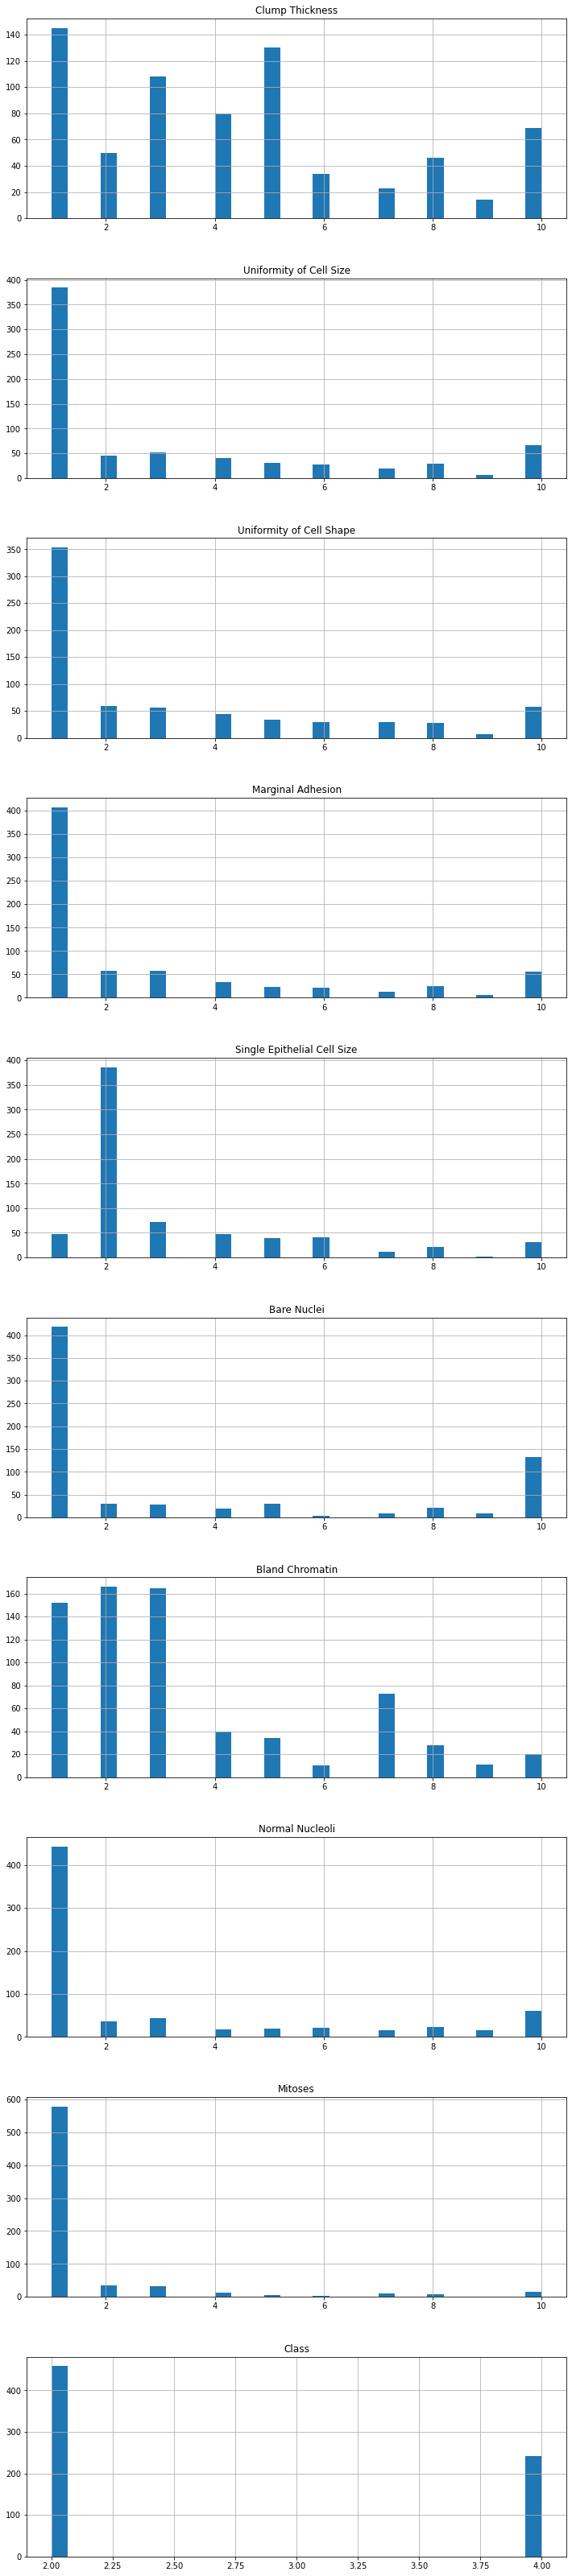

In [14]:
# plotting the histograms of each column to observe their distributions
fig, axes = plt.subplots(10,1, figsize=(12, 58))

i = 0

for axis in axes:
    df.hist(column = df.columns[i], bins = 30, ax=axis)
    i = i+1

I believe one possible outlier detection method viable to this situation would be a 'clustering-based' approach. In this particular method an outlier can be defined whether or not an object belongs to any cluster. Furthermore, there could be a large distance between the object and its closest cluster which therefore determines it as an outlier. The reason why I believe this is could be a possible method to use is when inspecting the histograms for each feature as is shown above; we can see that most features are positively skewed, this indicates that each feature would distinct clusters when visualised and therefore it would be reasonable to use a cluster-based approach.

# Question 3

In [15]:
# amount of precipitation in a list
precip = [22.93, 20.69, 25.75, 23.84, 25.34, 3.25, 23.55, 28.28, 23.72, 22.42, 26.83, 23.82]
# calculating mean and standard deviation of recordings
mean = statistics.mean(precip)
sd = statistics.stdev(precip)
# calculating the difference of the most deviated value
# which in this case was lowest value 3.25 there min method was used
most_dev_val = mean - min(precip)
most_dev_val

19.285

We know that the μ ± 3σ region contains 99.7% of the data under the assumption of a normal distribution. Therefore, if the most_deviated_value/standard_deviation > 3 it can be classed as an outlier

In [16]:
# checking the condition
most_dev_val/sd > 3

True

Thus 3.25 can be identified as an outlier

# Question 4
# Code taken from ESC755_Lab07

In [17]:
# load dataset
stocks = pd.read_csv('stocks.csv', header='infer') 
stocks.index = stocks['Date']
stocks = stocks.drop(['Date'],axis=1)
N,d = stocks.shape
# Compute percentage change dataframe
delta = pd.DataFrame(100*np.divide(stocks.iloc[1:,:].values-stocks.iloc[:N-1,:].values, stocks.iloc[:N-1,:].values),
                    columns=stocks.columns, index=stocks.iloc[1:].index)
delta.head()
delta_values = delta.values

In [18]:
from sklearn.svm import OneClassSVM
# declare and predict values based on the 'delta' (percentage change) values
model = OneClassSVM(nu=0.01,gamma='auto')
predictions = model.fit_predict(delta_values)
# selecting all rows that are not outliers (values = -1 are outliers, values = +1 are not outliers)
mask = predictions != -1
X = delta_values[mask, :]
X

array([[-0.16745478,  2.52996005,  0.63753232],
       [-0.57027845, -1.03896104, -0.80118505],
       [ 0.97841096,  1.44356955,  0.39443838],
       ...,
       [-0.45827592, -1.1299435 , -1.23839446],
       [-0.14287982, -0.16326531, -1.47783251],
       [-1.20827182, -0.81766149,  0.45454545]])

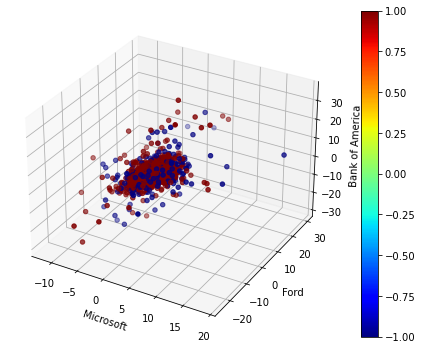

In [19]:
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
# Plot 3D scatterplot of outlier scores
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(delta.MSFT,delta.F,delta.BAC,c=predictions,cmap='jet')
# labeling axes
ax.set_xlabel('Microsoft')
ax.set_ylabel('Ford')
ax.set_zlabel('Bank of America')
fig.colorbar(p)
plt.show()

When inspecting the 3D plots of the parametric and proximity-based methods in the ECS766_Lab07 notebook and comparing them with the one-class SVM model used above there is a clear distinction between the three. In the former plots the variation in colour and therefore the number of outliers is significantly lower, in other words, their central cluster consisted of only one colour indicating small changes in the stock prices, however, the points on the periphery of the main cluster illustrated these outliers and hence different colours. On the other hand the one-class SVM plot above, it is apparent the variation in color within the central cluster representing much more outliers detected than the former two methods. In addition the one-class SVM model returned the percentage of outliers detected as 18% (calculated below) which is very large and indicates a stock price outlier nearly one day in every five.

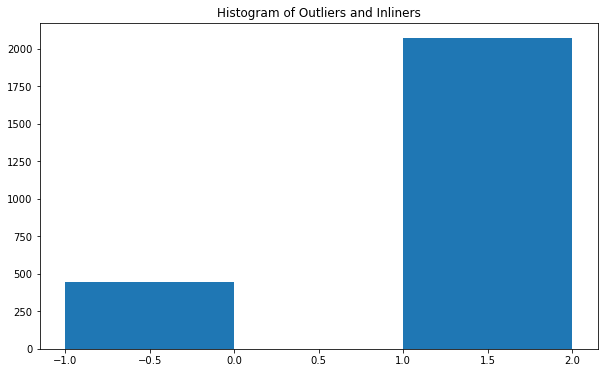

In [20]:
# Histogram plot of Outliers (-1) and Inliners (+1)
plt.figure(figsize=(10,6))
plt.hist(predictions, bins=[-1,0,1,2])
plt.title('Histogram of Outliers and Inliners')
plt.show()

In [21]:
# showing the difference before and after removing outliers
print(predictions.shape)
print(X.shape)

# Calculate the percentage
outlier_percentage = (predictions.shape[0]-X.shape[0])/(predictions.shape[0])*100
print(f'Percentage of outliers in dataset: {outlier_percentage:.2f}%')

(2517,)
(2069, 3)
Percentage of outliers in dataset: 17.80%


# Question 5

In [22]:
# importing visulisation libraries
%matplotlib inline
import matplotlib.pyplot as plt
# importing preprocessing and principle component analysis libraries
from sklearn.decomposition import PCA

In [23]:
# Loading the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = pd.read_csv(url, header=None)

# Extracting the values from the dataframe
data = df.values

# Split dataset into input and output elements
X, y = data[:, :-1], data[:, -1]

print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [24]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

# Implement a k-nearest neighbour approach using k=2 neighbours
knn = 2
# fitting the model to the input features
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(X)
distances, indices = nbrs.kneighbors(X)

# The outlier score is set as the distance between the point and its k-th nearest neighbour
outlier_score = distances[:,knn-1]

In [25]:
# performing the z-score normalisation to the input variables
from scipy.stats import zscore
X_zscore = zscore(X)
# putting normalised input variables back into a dataframe to check
X_zscore = pd.DataFrame(X_zscore)
X_zscore

0         1         2         3         4         5         6   \
0   -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1   -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2   -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3   -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4   -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   
..        ...       ...       ...       ...       ...       ...       ...   
501 -0.413229 -0.487722  0.115738 -0.272599  0.158124  0.439316  0.018673   
502 -0.415249 -0.487722  0.115738 -0.272599  0.158124 -0.234548  0.288933   
503 -0.413447 -0.487722  0.115738 -0.272599  0.158124  0.984960  0.797449   
504 -0.407764 -0.487722  0.115738 -0.272599  0.158124  0.725672  0.736996   
505 -0.415000 -0.487722  0.115738 -0.272599  0.158124 -0.362767  0.434732   

           7         8         9         10        11        12  
0    0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  
1    0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439  
2    0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  
3    1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  
4    1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  
..        ...       ...       ...       ...       ...       ...  
501 -0.625796 -0.982843 -0.803212  1.176466  0.387217 -0.418147  
502 -0.716639 -0.982843 -0.803212  1.176466  0.441052 -0.500850  
503 -0.773684 -0.982843 -0.803212  1.176466  0.441052 -0.983048  
504 -0.668437 -0.982843 -0.803212  1.176466  0.403225 -0.865302  
505 -0.613246 -0.982843 -0.803212  1.176466  0.441052 -0.669058  

[506 rows x 13 columns]

In [26]:
# performing the Principle Component Analysis
pca = PCA(n_components=2)
# fitting and transforming on the normalised input features
projected = pca.fit_transform(X_zscore)
# displaying each principle component values in a dataframe
projected2 = pd.DataFrame(projected, columns=['pc1','pc2'])
projected2

pc1       pc2
0   -2.098297  0.773113
1   -1.457252  0.591985
2   -2.074598  0.599639
3   -2.611504 -0.006871
4   -2.458185  0.097712
..        ...       ...
501 -0.314968  0.724285
502 -0.110513  0.759308
503 -0.312360  1.155246
504 -0.270519  1.041362
505 -0.125803  0.761978

[506 rows x 2 columns]

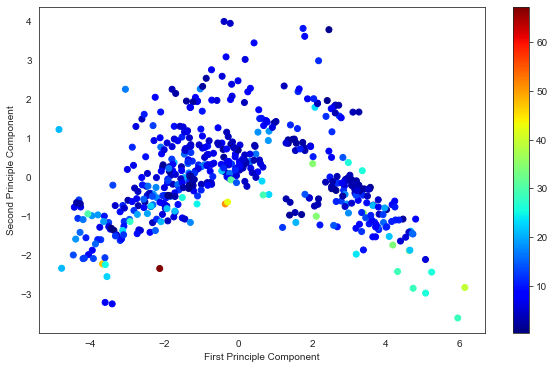

In [27]:
import seaborn as sns
#figure.set_facecolor('white')
sns.set_style('white')
plt.figure(figsize=(10,6))
# Labelling both axes
plt.ylabel('Second Principle Component')
plt.xlabel('First Principle Component')
# compute the scatter plot, note color is based of the outlier-scores
plt.scatter(projected2['pc1'], projected2['pc2'],c=outlier_score, cmap='jet')
plt.colorbar()
plt.show()